<a href="https://colab.research.google.com/github/NicoGangi5/Deep_Neural_Networks_with_PyTorch/blob/main/DifferentiationInPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Derivatives

In [ ]:
# These are the libraries will be useing for this lab.

import torch 
import matplotlib.pylab as plt

In [ ]:
# Create a tensor x

x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

The tensor x:  tensor(2., requires_grad=True)


In [ ]:
# Create a tensor y according to y = x^2

y = x ** 2
print("The result of y = x^2: ", y)

The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)


In [ ]:
# Take the derivative. Try to print out the derivative at the value x = 2

y.backward()
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor(4.)


In [ ]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [ ]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x7f2f92ea2860>
grad: None
is_leaf: False
requires_grad: True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Calculate the y = x^2 + 2x + 1, then find the derivative 

x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print("The result of y = x^2 + 2x + 1: ", y)
y.backward()
print("The dervative at x = 2: ", x.grad)

The result of y = x^2 + 2x + 1:  tensor(9., grad_fn=<AddBackward0>)
The dervative at x = 2:  tensor(6.)


In [ ]:
# Practice: Calculate the derivative of y = 2x^3 + x at x = 1

x = torch.tensor(1.0, requires_grad=True)
y = 2 * x ** 3 + x
print("The result of y = 2x^3 + x: ", y)
y.backward()
print("The derivative at x = 1: ", x.grad)

The result of y = 2x^3 + x:  tensor(3., grad_fn=<AddBackward0>)
The derivative at x = 1:  tensor(7.)


In [ ]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [ ]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

# Partial Derivatives


In [ ]:
# Calculate f(u, v) = v * u + u^2 at u = 1, v = 2

u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
print("The result of v * u + u^2: ", f)

The result of v * u + u^2:  tensor(3., grad_fn=<AddBackward0>)


In [ ]:
# Calculate the derivative with respect to u

f.backward()
print("The partial derivative with respect to u: ", u.grad)

The partial derivative with respect to u:  tensor(4.)


In [ ]:
# Calculate the derivative with respect to v

print("The partial derivative with respect to u: ", v.grad)

The partial derivative with respect to u:  tensor(1.)


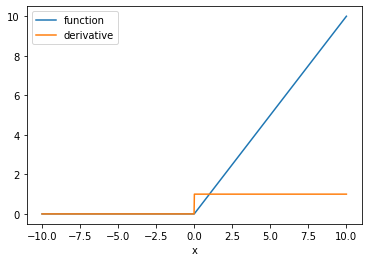

In [ ]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

In [ ]:
y.grad_fn

In [ ]:
# Practice: Calculate the derivative of f = u * v + (u * v) ** 2 at u = 2, v = 1

u = torch.tensor(2.0,requires_grad=True)
v = torch.tensor(1.0,requires_grad=True)
f = u * v + (u * v) ** 2
print("The result of v * u + u^2: ", f)

f.backward()
print("The partial derivative with respect to u: ", u.grad)

f = u * v + (u * v) ** 2
f.backward()
print("The partial derivative with respect to u: ", v.grad)

The result of v * u + u^2:  tensor(6., grad_fn=<AddBackward0>)
The partial derivative with respect to u:  tensor(5.)
The partial derivative with respect to u:  tensor(20.)
